In [1]:
%load_ext autoreload
%autoreload 2

# Compare datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# fn_sim = './data/simulate_circuits/2025_01_29__18_12_38/tabulated_mutation_info.json'
fn_241121 = '../data/raw/summarise_simulation/2024_11_21_160955/tabulated_mutation_info.csv'
fn_250211 = './data/simulate_circuits/2025_02_11__13_56_51/tabulated_mutation_info.json'

df_241121 = pd.read_csv(fn_241121)
df_250211 = pd.read_json(fn_250211) if fn_250211.endswith('.json') else pd.read_csv(fn_250211)

/tmp/ipykernel_1211416/1641336137.py:5: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_241121 = pd.read_csv(fn_241121)


In [4]:
from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols
cols_e = get_true_interaction_cols(df_241121, 'energies', remove_symmetrical=True)

# Visualise to compare

These datasets should have the same binding energy distribution

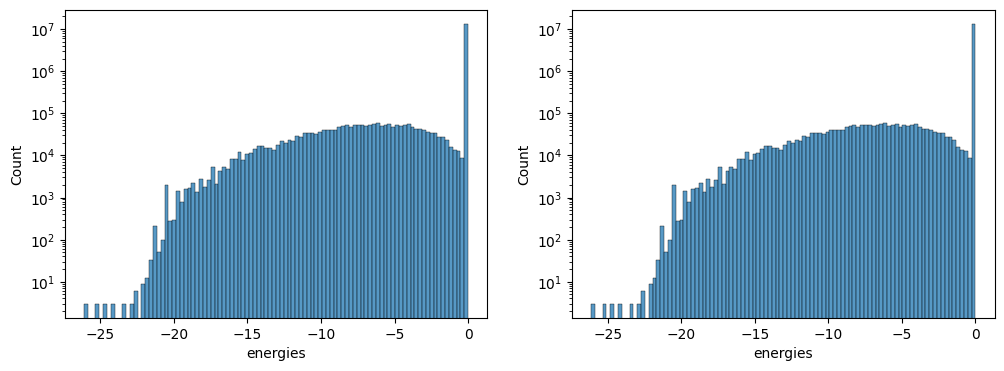

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(6*2, 4))

sns.histplot(df_241121.melt(value_vars=cols_e, var_name='idx', value_name='energies'), 
             x='energies', bins=100, ax=axs[0])
axs[0].set_yscale('log')

sns.histplot(df_250211.melt(value_vars=cols_e, var_name='idx', value_name='energies'), 
             x='energies', bins=100, ax=axs[1])
axs[1].set_yscale('log')